In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ROOT as r
%jsroot on
r.PyConfig.DisableRootLogon = True
r.PyConfig.IgnoreCommandLineOptions = False

Welcome to JupyROOT 6.28/06


In [2]:
E = np.arange(10,100,0.01)
PD = -(0.2/90)*(E-30)+0.35
#PD = np.empty_like(E)
#PD.fill(0.85)
array = np.empty([len(E),2])
for i in range(len(E)):
    array[i,0] = E[i]
    array[i,1] = PD[i]
print(np.round(array,5))
np.savetxt("/home/jacob/PD_TestArray.txt",np.round(array,5),fmt = '%f')

[[10.       0.15556]
 [10.01     0.15558]
 [10.02     0.1556 ]
 ...
 [99.97     0.35549]
 [99.98     0.35551]
 [99.99     0.35553]]


In [3]:
E = np.arange(10,100,0.01)
PA = (20/90)*(E-30)+50
#PA = np.empty_like(E)
#PA.fill(45)
array = np.empty([len(E),2])
for i in range(len(E)):
    array[i,0] = E[i]
    array[i,1] = PA[i]
print(array)
np.savetxt("/home/jacob/PA_TestArray.txt",np.round(array,5),fmt = '%f')

[[10.         45.55555556]
 [10.01       45.55777778]
 [10.02       45.56      ]
 ...
 [99.97       65.54888889]
 [99.98       65.55111111]
 [99.99       65.55333333]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


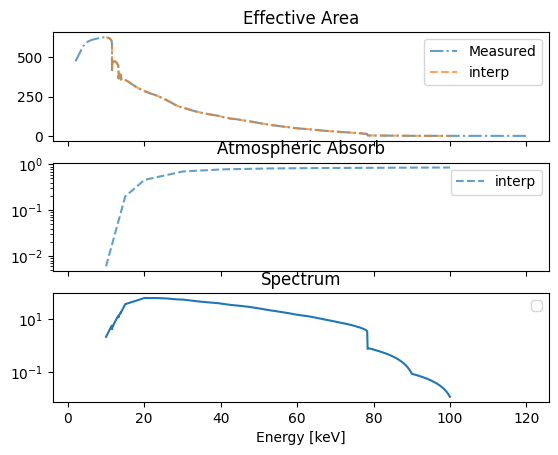

In [4]:
effect_area_file = np.loadtxt("/mnt/c/Users/jacob/Downloads/Effective_area_and_air_absorption/ah_hx1_telarea_20140101v002_t1.txt",delimiter=" ")
airabsorbsion = np.loadtxt("/mnt/c/Users/jacob/Downloads/Effective_area_and_air_absorption/air_augment.txt",delimiter=" ")
airabsorbsion[:,0] *= 1000
E = np.arange(10,100,0.01)


effective_area = np.interp(E,effect_area_file[:,0],effect_area_file[:,1])

atmospheric_absorb = np.exp(-np.interp(E,airabsorbsion[:,0],airabsorbsion[:,1]))#/(20*np.cos(15)))

#plt.plot(E,atmospheric_absorbtion)

def func_powerlaw(x, m, c):
    return (x**-m) * c

Counts = np.empty_like(E)
Counts.fill(1)

array = np.empty([len(E),2])
for i in range(len(E)):
    array[i,0] = E[i]
    array[i,1] = func_powerlaw(E[i], 0.25,1)*effective_area[i] * atmospheric_absorb[i]
    #array[i,1] = func_powerlaw(E[i], 0.1,1)*effective_area[i]* (atmospheric_absorbtion)

fig,ax = plt.subplots(3,1,sharex=True)
ax[0].set_title("Effective Area")
ax[0].plot(effect_area_file[:,0],effect_area_file[:,1],alpha=0.7,linestyle='-.',label='Measured')
ax[0].plot(E,effective_area,alpha=0.7,linestyle='--',label = 'interp')
ax[0].legend()

ax[1].set_title("Atmospheric Absorb")
#ax[1].semilogy(airabsorbsion[:,0],airabsorbsion[:,1],alpha=0.7,linestyle='-.',label='Measured')
ax[1].semilogy(E,atmospheric_absorb,alpha=0.7,linestyle='--',label = 'interp')
ax[1].legend()

ax[2].set_title("Spectrum")
ax[2].semilogy(array[:,0],array[:,1])#,label='power-law * effective area * Atmospheric Absorb')
ax[2].set_xlabel("Energy [keV]")
ax[2].legend()
np.savetxt("/home/jacob/Spectrum_TestArray.txt",np.round(array,5),fmt = '%f')

In [5]:
path_to_test_data = "~/xlc_sim_outputs/Varying_Rotation_Angle/SimData_Histograms_RotAng0.root"
test_data = r.RDataFrame('tree_0',path_to_test_data)
xbin = np.arange(0.5,33.5,1)

test_hist = test_data.Histo1D(('Likelihoods PA','Likelihoods PA=0',len(xbin)-1,xbin),'horizontal_pixel')
c = r.TCanvas("","",600,500)
test_hist.Draw('hist')
test_hist.Scale(1/test_hist.Integral(),"width")
test_hist.GetXaxis().SetRangeUser(0,32)
test_hist.GetXaxis().SetTitle("Column")
test_hist.GetYaxis().SetTitle("Likelihoods")
c.SetRightMargin(0.15)
c.SetLeftMargin(0.15)
#c.SetBottomMargin(0.15)
c.Draw('hist')
c.SaveAs('~/LikelihoodsPlot0.png','png')

Info in <TCanvas::Print>: png file /home/jacob/LikelihoodsPlot0.png has been created


In [6]:
path_to_Unpolarized_Data = "~/xlc_sim_outputs/flight_like/UnPolarized.root"

unpol_File = r.TFile.Open(path_to_Unpolarized_Data,"read")
PD0_Tree = unpol_File.Get(f"PD0")

unpol_data = r.RDataFrame('PD0',path_to_Unpolarized_Data)
xbin = np.arange(0.5,33.5,1)

unpol_hist = unpol_data.Histo1D(('Unpolarized Likelihoods','Unpolarized Likelihoods',len(xbin)-1,xbin),'horizontal_pixel')
unpol_hist.Scale(1/unpol_hist.Integral(),"width")
c = r.TCanvas("","",500,500)
unpol_hist.GetXaxis().SetRangeUser(0,32)
unpol_hist.GetXaxis().SetTitle("Column")
unpol_hist.GetYaxis().SetTitle("Likelihoods")
unpol_hist.Draw('hist')
c.SetRightMargin(0.15)
c.SetLeftMargin(0.15)
c.Draw('Hist')
c.SaveAs('~/UnPolLikelihoodsPlot.png','png')



new_hist = (1-0.45)*unpol_hist.GetPtr()+(0.45)*test_hist.GetPtr()

Info in <TCanvas::Print>: png file /home/jacob/UnPolLikelihoodsPlot.png has been created


In [7]:
c = r.TCanvas("","",500,500)
new_hist.SetStats(0)
new_hist.Draw('hist')

new_hist.GetXaxis().SetRangeUser(0,32)
new_hist.SetTitle("45% Polarized")
new_hist.GetXaxis().SetTitle("Column")
new_hist.GetYaxis().SetTitle("Likelihoods")
c.SetRightMargin(0.15)
c.SetLeftMargin(0.15)
c.SaveAs('~/45PolarizedPlot.png','png')
c.Draw('hist')

Info in <TCanvas::Print>: png file /home/jacob/45PolarizedPlot.png has been created
